#Bibliotecas

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 289kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/census.csv')

In [ ]:
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.describe

<bound method NDFrame.describe of        age          workclass  ...  native-country  income
0       39          State-gov  ...   United-States   <=50K
1       50   Self-emp-not-inc  ...   United-States   <=50K
2       38            Private  ...   United-States   <=50K
3       53            Private  ...   United-States   <=50K
4       28            Private  ...            Cuba   <=50K
...    ...                ...  ...             ...     ...
32556   27            Private  ...   United-States   <=50K
32557   40            Private  ...   United-States    >50K
32558   58            Private  ...   United-States   <=50K
32559   22            Private  ...   United-States   <=50K
32560   52       Self-emp-inc  ...   United-States    >50K

[32561 rows x 15 columns]>

#Valores Nulos

In [ ]:
df.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
#ver quantos tipos de atributos há no campo income 
np.unique(df['income'], return_counts= True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

#Gráficos

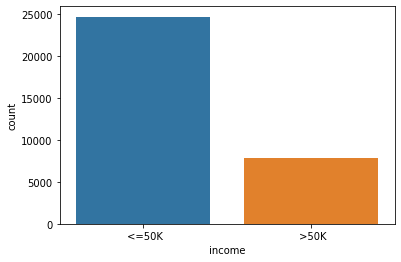

In [ ]:
sns.countplot(x= df['income'])

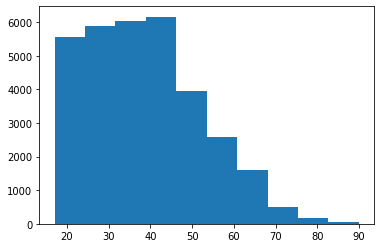

In [ ]:
#histograma
plt.hist(df['age']);

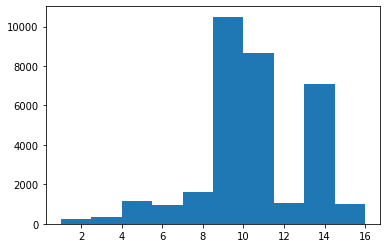

In [ ]:
plt.hist(x =df['education-num']);

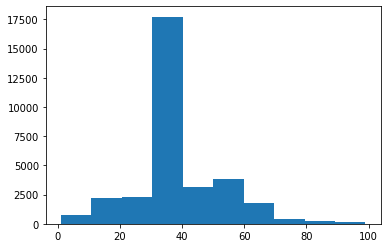

In [ ]:
plt.hist(x=df['hour-per-week']);

In [ ]:
#Gráfico treemap

In [ ]:
grafico = px.treemap(df, path=['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(df, path=['occupation', 'relationship'])
grafico.show()

In [ ]:
#gráfico de categorias paralelas

In [ ]:
grafico = px.parallel_categories(df, dimensions= ['occupation','relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(df, dimensions= ['occupation','relationship','income'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(df, dimensions= ['income','education'])
grafico.show()

#Divisão entre classes e previsores

In [ ]:
#Por padrão devemos definir o nome dos previsores como x e o nome das classes como y
x_census = df.iloc[:,0:14].values #values para colocar no formato do numpy array

In [ ]:
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census = df.iloc[:, 14].values #lembre-se que, nesse caso você busca apenas 1 coluna. então não se configura no caso do iloc onde o último indice é desprezado

In [ ]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

#Tratamento dos atributos categóricos

Label encoder - Transforma os atributos nominais em números

In [ ]:
#Note que o objeto das categorias está reconhecido como string. E para aplicar os algoritimos de machine learning é necessário realizar uma série 
#de calculos. Por isso é necessário o tratamento dos dados. 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_maritalstatus = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_marital_country = LabelEncoder()

In [ ]:
#lembrar de mudar os workclass <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
x_census[:,1] =label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] =label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] =label_encoder_maritalstatus.fit_transform(x_census[:,5])
x_census[:,6] =label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] =label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] =label_encoder_race .fit_transform(x_census[:,8])
x_census[:,9] =label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] =label_encoder_marital_country.fit_transform(x_census[:,13])

In [ ]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

# OneHotEnconder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
#'OneHot' é uma string que recebe a transformação que nos vamos fazer
#OneHotEncoder esse segundo parâmetro é o código importado do sklearn
#e o terceito parâmetro é basicamente a lista do que vamos transformar
#o onehotenconder vai transformar cada valor individual em uma nova colular. 
#por exemplo, dentro da coluna workclass, há o campo selfemployed, que ira se transformar em uma coluna baseada em 0 e 1 (01001 ou 0001 e etc)
#Pois o algoritmo de machine learning pode interpretar os valores numéricos de uma forma a dar importancia ao mais alto
#Quando o label encoder transformou tudo em número, cada classe dentro da coluna recebeu um número: ex 1, 2, 3 ,4
#E para a máquina o número 4 pode ter mais importância do que o 1, por ser um valor maior
#remainder='passthrough' indica q o código não vai apagar os outros atributos
onehotencoder_census = ColumnTransformer(transformers=[('OneHot' , OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [ ]:
#agora o x_census deverá receber o valor acima, convertido como array do numpy
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [ ]:
#Perceba que agora há 108 colunas
x_census.shape

(32561, 108)

In [ ]:
x_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

#Escalonamento de Valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [ ]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

#Dividindo uma base para treinamento e uma para teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#o test_size define o tamanho da base de dados de teste e o random_state = 0 deverá ser utilizado 
#pois devine permanentemente essa base como teste e evita que o algoritimo crie sempre uma nova
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

In [ ]:
x_census_treinamento.shape , x_census_teste.shape, y_census_teste.shape

((27676, 108), (4885, 108), (4885,))

#Salvando Base de dados

In [ ]:
#assim você evita a necessidade de todo esse pré processamento
import pickle

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)

SyntaxError: ignored

#Naives Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, accura

In [ ]:
census_prev = GaussianNB()
census_prev.fit(x_census_treinamento,  y_census_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
previsoes = census_prev.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



0.4767656090071648

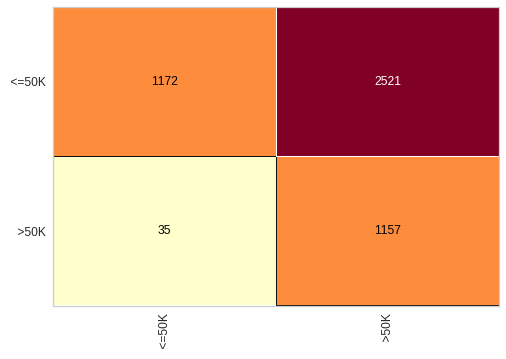

In [ ]:
cm = ConfusionMatrix(census_prev)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



#Previsão Instâncias(por aproximação) KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [41]:
x_census_treinamento.shape

(27676, 108)

In [54]:
knn_census = KNeighborsClassifier(n_neighbors= 20)
knn_census.fit(x_census_treinamento, y_census_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [55]:
previsoes = knn_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [45]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [56]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)


0.8298874104401228

In [46]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.8298874104401228

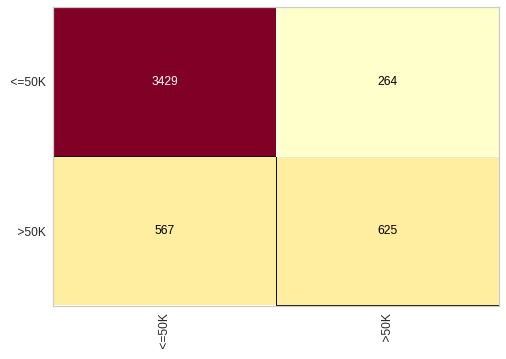

In [57]:
cm = ConfusionMatrix(knn_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

